In [ ]:
import h5py

# Path to the HDF5 file
file_path = "fdm-ic_p4320_b10000_m3.5e-23/density_halo_0.hdf5"

def inspect_hdf5(file_path):
    try:
        with h5py.File(file_path, "r") as f:
            # List all groups and datasets in the HDF5 file
            print("Groups and datasets within the file:")
            def print_attrs(name, obj):
                print(name)
                for key, val in obj.attrs.items():
                    print("    %s: %s" % (key, val))
            f.visititems(print_attrs)
    except Exception as e:
        print("An error occurred while inspecting the HDF5 file:", e)

inspect_hdf5(file_path)

def check_dimensions(file_path):
    try:
        with h5py.File(file_path, "r") as f:
            print("Dataset dimensions:")
            def print_shape(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(name, obj.shape)
            f.visititems(print_shape)
    except Exception as e:
        print("An error occurred while checking dimensions:", e)

check_dimensions(file_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py


def get_projections(file_path):
    
    with h5py.File(file_path, "r") as f:
        dataset = f["FuzzyDM/DENSITY"]

        fdm_density = np.array(dataset)
        print(np.shape(fdm_density))

        # Create simple 2D projections along x, y, and z axes
        x_proj = np.sum(fdm_density, axis=0)
        y_proj = np.sum(fdm_density, axis=1)
        z_proj = np.sum(fdm_density, axis=2)
        
    return fdm_density, x_proj, y_proj, z_proj

def plot_projection(proj):
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Corrected the subplot creation
    ax.imshow(proj, cmap='viridis', origin='lower', norm=LogNorm())

    # Add colorbar and labels
    cbar = fig.colorbar(ax.imshow(proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax)
    cbar.set_label('Density')
    ax.set_title('Projection')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    plt.show()


def plot_2d_projections(x_proj, y_proj, z_proj):

    f, ax = plt.subplots(1, 3, figsize=(30, 9))
    ax[0].imshow(x_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[1].imshow(y_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[2].imshow(z_proj, cmap='viridis', origin='lower', norm=LogNorm())

    # Add colorbars and labels
    cbar = f.colorbar(ax[0].imshow(x_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[0])
    cbar.set_label('Density')
    ax[0].set_title('X-axis Projection')
    ax[0].set_xlabel('Y-axis')
    ax[0].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[1].imshow(y_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[1])
    cbar.set_label('Density')
    ax[1].set_title('Y-axis Projection')
    ax[1].set_xlabel('X-axis')
    ax[1].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[2].imshow(z_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[2])
    cbar.set_label('Density')
    ax[2].set_title('Z-axis Projection')
    ax[2].set_xlabel('Y-axis')
    ax[2].set_ylabel('Z-axis')

    plt.suptitle('2D Projections of Density (Log Scale)')
    plt.show()

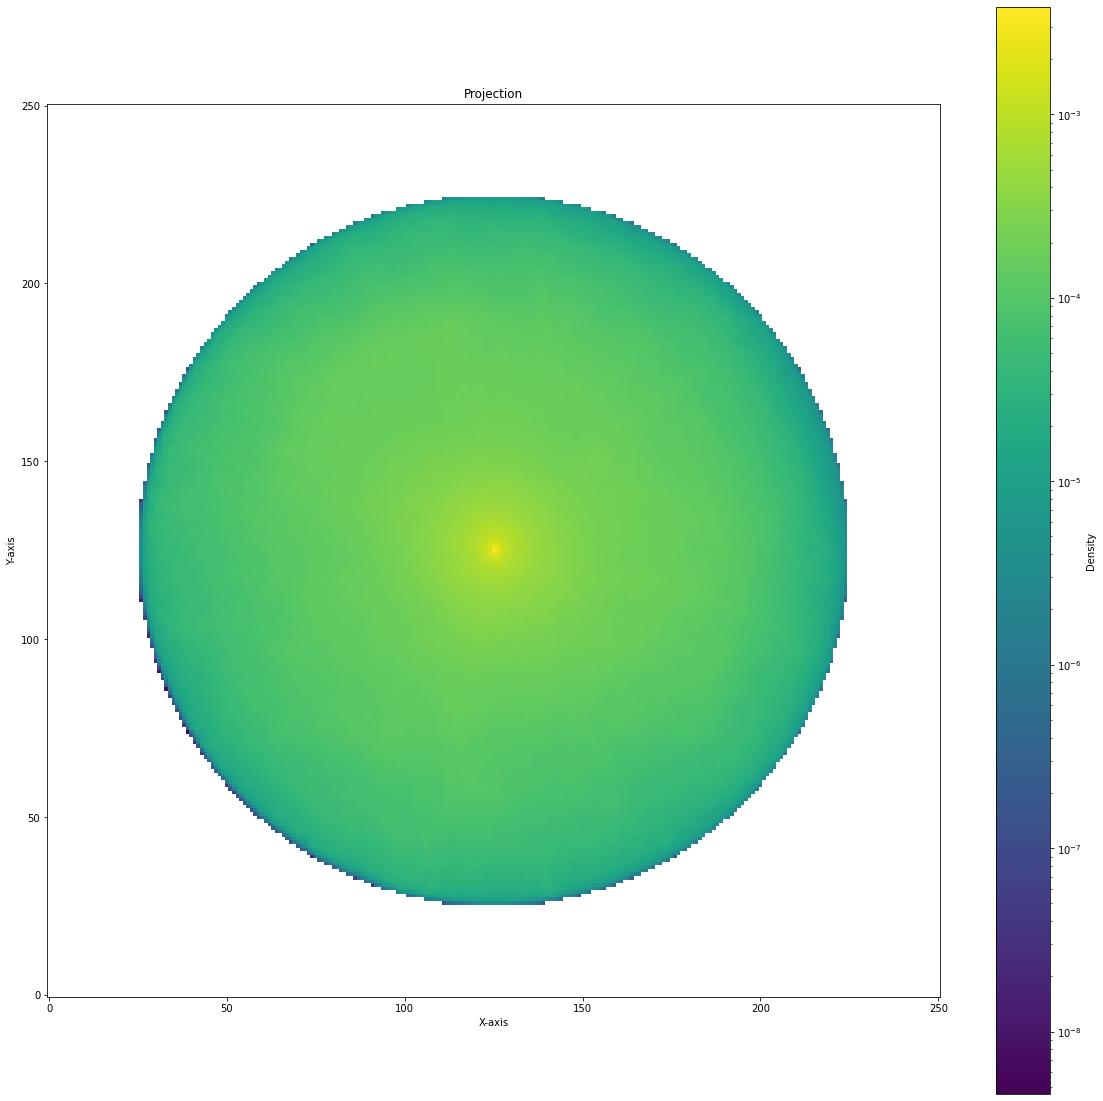

In [3]:
# Get host profile by averaging different projections

def make_host(N_proj):

    allprojs = []

    for i in range(N_proj):
        x_proj = np.load("all_projs/Proj_"+str(i)+"_x.npy")
        allprojs.append(x_proj)
        y_proj = np.load("all_projs/Proj_"+str(i)+"_y.npy")
        allprojs.append(y_proj)
        z_proj = np.load("all_projs/Proj_"+str(i)+"_z.npy")
        allprojs.append(z_proj)

    host = np.mean(allprojs,axis=0)
    #plot_projection(host)
    np.save("host_k0.npy", host)
    
    return host, allprojs

In [2]:
def find_substructure(host):

    all_substructure = []

    for i in range(len(allprojs)):
        proj = allprojs[i]

        substrcuture = proj - host
        all_substructure.append(substrcuture)
        np.save("all_substructure.npy", all_substructure)
        
    return all_substructure

In [24]:
# Subtract host halo from all the projections

def find_substructure():

    all_substructure = []

    for i in range(len(allprojs)):
        proj = allprojs[i]

        k0 = host

        substrcuture = proj - k0
        all_substructure.append(substrcuture)
        np.save("all_substructure.npy", all_substructure)
        
    return all_substructure